<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1MleNI0rcICpvrGd7SdYuQz7dn8NlAlEc" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

<center> <h1> Regularisation and Other Regression models (Live coding) </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;color:#303030">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p> <strong> Outline:</strong>
        <a id="P0" name="P0"></a>
        <ol>
            <li> <a href='#I'>Import Libraries </a> </li>
            <li> <a href='#P1'>Data Generation</a></li>
            <li> <a href='#P3'>Train and test split</a></li>
            <li> <a href='#P4'>Ridge Regression model</a></li>
            <li> <a href='#P5'>Alpha analysis of Ridge regression</a></li>
            <li> <a href='#P6'>Semilog plot</a></li>
            <li> <a href='#CL'>Helper Code snippets for exercise</a></li>
        </ol>
        <strong>Topics Trained:</strong> Ridge Regression, effect of alpha values, other regression algorithmns </p>
   </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ml-materials/index.html" title="momentum"> Applied Machine Learning Short Course</a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ml-materials/weeks/preparation/index.html" title="momentum">Course Preparation</a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ml-materials/weeks/preparation/pages/MLG_W0D0_HT2_start_with_Python_and_Colab.html" title="momentum">Live coding: Regularisation and Other Regression models</a>
</strong></nav>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [ ]:
import warnings
warnings.filterwarnings('ignore')

__Load data__

In [ ]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


__Train and test split__

In [ ]:
X = df.iloc[:,:-1]
y = df.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train.shape, X_test.shape

((455, 13), (51, 13))

__Pipeline__

<span style="color:orange">Now that we have loaded and split the data into train and test, we will create a pipeline to scale the data and apply the Ridge regularization technique.</span>

In [ ]:
sc = StandardScaler()
ridge_regr = Ridge()

pipeline_ridge = Pipeline([("data_scaling", sc), 
                           ("estimator", ridge_regr)])


pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()), ('estimator', Ridge())])

In [ ]:
ridge_regr

Ridge()

<span style="color:orange">What does our intercept look like?</span>

In [ ]:
pipeline_ridge.named_steps["estimator"].intercept_,

(22.12483516483517,)

<span style="color:orange">Lets look at the coefficients as well</span>

In [ ]:
coefs = pipeline_ridge.named_steps["estimator"].coef_
pd.DataFrame({
    'Feature': X_train.columns, 
    'Coef': coefs
})

,Feature,Coef
0,CRIM,-0.998585
1,ZN,1.256067
2,INDUS,-0.036044
3,CHAS,0.817951
4,NOX,-1.795664
5,RM,2.505756
6,AGE,-0.076617
7,DIS,-3.171307
8,RAD,2.459761
9,TAX,-1.847486


__Using different alpha values__

<span style="color:orange">Are you still a bit lost about Ridge regression and its Alpha value? Lets take a quick look at what it is.</span>


Ridge and Lasso regression are basically regularization techniques. This means that it uses different parameters and values to shrink or penalize the coefficients.

When we fit a model, we are asking it to learn a set of coefficients that best fit over the training distribution as well as hope to generalize on test data points as well. Learning those coefficients can be done in various ways and multiple techniques are there to reduce the error in coefficients such as LMS(Least mean Squared), RSS(Residual Sum of Squares).

Now suppose we are training a model using either LMS or RSS, then ridge regression makes use of the extra term which penalizes the results of LMS or RSS towards zero.

__Thats great and all but what the heck is Alpha!?__

Well, Ridge term includes the alpha term, which is nothing but the penalty or the tuning parameter.

The alpha term acts as the control parameter, which determines, how much significance should be given to the features for given its corresponding coefficients. If Alpha is close to zero, the Ridge term itself is very small and thus the final error is based on RSS alone. If Alpha is too large, the impact of shrinkage grows and the coefficients tends to zero.

Choosing the right value helps the model learn the right features and better generalize the coefficients.

<span style="color:orange">Now, lets finally implement different alpha values to see its effect on our features.</span>

In [ ]:
ridge_regr

Ridge()

In [ ]:
alphas = np.logspace(-5, 6, num=101)

coefs = []
rscore_test = []
rscore_train = []

for a in alphas:
    # we set the parameter of alpha to 'a'. Yes, the pipeline automatically does this for us. :) 
    pipeline_ridge.set_params(estimator__alpha=a)
    # we fit pipelin to our training data
    pipeline_ridge.fit(X_train, y_train)
    # and append the default score to a list
    rscore_train.append(pipeline_ridge.score(X_train, y_train))
    # we do the same for our test data
    coefs.append(pipeline_ridge.named_steps["estimator"].coef_)
    rscore_test.append(pipeline_ridge.score(X_test, y_test))

__Visualization__

<span style="color:orange">Lets look at the effects of Alpha on our features</span>

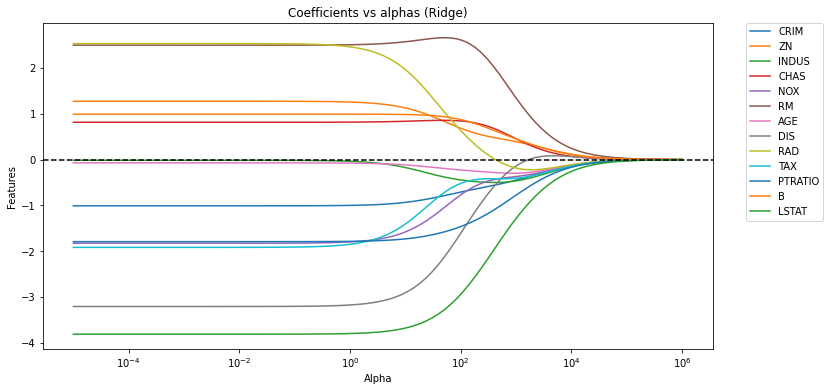

In [ ]:
plt.subplots(figsize=[12, 6])
plt.plot(alphas, coefs)
plt.xscale("log")    # we apply log scale to have a better view
plt.title("Coefficients vs alphas (Ridge)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Features")
plt.legend(labels=df.columns[:-1], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(False);

<span style="color:orange">We then store all of our finding in a dataframe</span>

In [ ]:
df_coefs = pd.DataFrame(coefs)
df_coefs.columns = df.iloc[:, :-1].columns.values

df_coefs.insert(0, "train_score", rscore_train)
df_coefs.insert(0, "test_score", rscore_test)
df_coefs.insert(0, "alpha", alphas)

df_coefs.head()

,alpha,test_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000010,0.717619,0.736879,-1.007651,1.273438,-0.015053,0.814952,-1.824208,2.49634,-0.071003,-3.204335,2.532011,-1.914744,-1.789877,0.99263,-3.808294
1,0.000013,0.717619,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824208,2.49634,-0.071003,-3.204335,2.532010,-1.914744,-1.789877,0.99263,-3.808294
2,0.000017,0.717619,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532010,-1.914743,-1.789877,0.99263,-3.808294
3,0.000021,0.717619,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532010,-1.914743,-1.789877,0.99263,-3.808294
4,0.000028,0.717619,0.736879,-1.007651,1.273438,-0.015054,0.814952,-1.824207,2.49634,-0.071003,-3.204334,2.532009,-1.914743,-1.789877,0.99263,-3.808294


In [ ]:
df_coefs.tail()

,alpha,test_score,train_score,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
96,363078.054770,-0.158516,0.006581,-0.004373,0.004156,-0.005419,0.002076,-0.004781,0.007640,-0.004296,0.002870,-0.004160,-0.005121,-0.005439,0.003731,-0.008271
97,467735.141287,-0.160065,0.005120,-0.003400,0.003232,-0.004214,0.001612,-0.003719,0.005936,-0.003341,0.002234,-0.003236,-0.003983,-0.004227,0.002901,-0.006428
98,602559.586074,-0.161272,0.003981,-0.002643,0.002512,-0.003276,0.001252,-0.002891,0.004611,-0.002598,0.001738,-0.002516,-0.003096,-0.003285,0.002254,-0.004994
99,776247.116629,-0.162212,0.003095,-0.002053,0.001952,-0.002546,0.000972,-0.002247,0.003581,-0.002019,0.001352,-0.001956,-0.002406,-0.002552,0.001752,-0.003879
100,1000000.000000,-0.162943,0.002405,-0.001595,0.001516,-0.001978,0.000755,-0.001746,0.002781,-0.001569,0.001051,-0.001520,-0.001869,-0.001982,0.001361,-0.003013


<span style="color:orange">Using the semilog plot function from matplotlib, we can see the effects of alpha on our training and testing data</span>

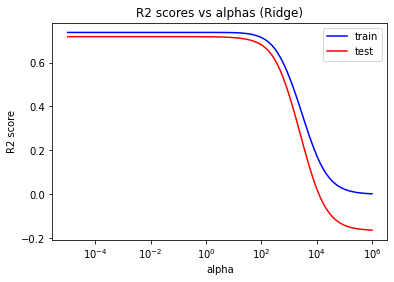

In [ ]:
plt.semilogx(df_coefs["alpha"], df_coefs["train_score"], color="blue", label="train")
plt.semilogx(df_coefs["alpha"], df_coefs["test_score"], color="red", label="test")

plt.title("R2 scores vs alphas (Ridge)")
plt.xlabel("alpha")
plt.legend()
plt.ylabel("R2 score");

**Helper Code snippets for exercise**

#### Model Selection of Other Regression Models

##### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
pipeline_tree= Pipeline([("data_scaling", sc), ("estimator", tree_reg)])

In [ ]:
tree_scores = cross_val_score(pipeline_tree, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores.mean()

4.5933092849734365

In [ ]:
cross_val_score(pipeline_tree, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)

array([-25.68263736, -12.55967033, -19.42967033, -13.1421978 ,
       -39.9632967 ])

In [ ]:
np.mean(cross_val_score(pipeline_tree, X_train, y_train,
                         scoring="r2", cv=5))

0.7251680502753527

##### Random Forest Regressor

In [ ]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline_forest= Pipeline([("data_scaling", sc), ("estimator", forest_reg)])

In [ ]:
forest_scores = cross_val_score(pipeline_forest, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean()

3.257521497320711

In [ ]:
cross_val_score(pipeline_forest, X_train, y_train,
                                scoring="r2", cv=5)

array([0.85485204, 0.89656334, 0.90646195, 0.88610891, 0.77666467])

In [ ]:
forest_scores = cross_val_score(pipeline_forest, X_train, y_train,
                                scoring="r2", cv=5)
forest_scores.mean()

0.8641301833450946

##### SVR

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")

pipeline_svm= Pipeline([("data_scaling", sc), ("estimator", svm_reg)])

In [ ]:
svm_scores = cross_val_score(pipeline_svm, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
svm_rmse_scores.mean()

4.984334302953604

##### XGB Regressor

In [ ]:
import xgboost as xgb

xgr = xgb.XGBRegressor(objective='reg:linear', n_estimators=50, max_depth=3, random_state=42)

pipeline_xgr= Pipeline([("data_scaling", sc), ("estimator", xgr)])

In [ ]:
xgr_scores = cross_val_score(pipeline_xgr, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
xgr_rmse_scores = np.sqrt(-xgr_scores)
xgr_rmse_scores.mean()

[13:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.1970216237001035

In [ ]:
xgr_scores = cross_val_score(pipeline_xgr, X_train, y_train,
                                scoring="r2", cv=5)
xgr_scores.mean()

[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8697610409984385

#### Choose Best model and Prediction

In [ ]:
from sklearn import metrics

In [ ]:
best_model = pipeline_xgr

In [ ]:
best_model.fit(X_train, y_train)

[13:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', XGBRegressor(n_estimators=50, random_state=42))])

In [ ]:
predictions = best_model.predict(X_test)
model_mse = metrics.mean_squared_error(y_test, predictions)
model_rmse = np.sqrt(model_mse)
model_rmse

3.50248362887328